In [67]:
import requests
import matplotlib.pyplot as plt
import random
import string
import json
import csv
import numpy as np
import pandas as pd
from pprint import pprint
import timeit
import time

### Exercise 1 – Web API

1. Get one month of historical weather data (i.e. temperatures). In specific: one month of data for 50 distinct locations.

In [68]:
# generate list of 50 distinct locations
city = ['Evanston', 'Ann Arbor', 'Norfolk', 'Columbus', 'St. Louis', 'St. Petersburg', 'Fargo', 'Mesquite', 'Cincinnati', 'Monterey', 'Honolulu', 'Victorville', 'Hemet', 'West Covina', 'Pomona', 'Tucson', 'Harrisburg', 'Daly City', 'Waco', 'Lincoln', 'Omaha', 'New Orleans', 'Westminster', 'Howell', 'Fort Lauderdale', 'Pensacola', 'Redding', 'Lakeland', 'Thousand Oaks', 'Olympia', 'Lake Charles', 'Cape Coral', 'Killeen', 'Albuquerque', 'Ogden', 'Las Cruces', 'Scranton', 'Hampton', 'Pasadena', 'Yonkers', 'Marysville', 'Hartford', 'San Antonio', 'San Francisco', 'Nashua', 'Clarksville', 'Huntsville', 'Buffalo', 'Mesa', 'Rochester']


In [69]:
# get weather data from website
def get_data(city):
    result_list=[]
    for i in city:
        response = requests.get("http://api.worldweatheronline.com/premium/v1/past-weather.ashx?"
                                + "key=f975a49eca1c46da9f3151636221110"
                                + "&q=" + i
                                + "&date=2022-09-01&enddate=2022-09-30"
                                + "&format=json")
        result = response.json()
        result_list.append(result)
    return result_list

start_time = time.time()
result_list=get_data(city)
end_time = time.time()
sequential_time=abs(start_time-end_time)

In [70]:
maximum=dict()
minimum=dict()
average=dict()
for i in result_list:
    maxtemp=[]
    mintemp=[]
    avgtemp=[]
    for j in i['data']['weather']:
        maxtemp.append(int(j['maxtempF']))
        mintemp.append(int(j['mintempF']))
        avgtemp.append(int(j['avgtempF']))
    minimum[i['data']['request'][0]['query']]=min(mintemp)
    maximum[i['data']['request'][0]['query']]=max(maxtemp)
    average[i['data']['request'][0]['query']]=sum(avgtemp)/len(avgtemp)

In [71]:
maxx=maximum.values()
minn=minimum.values()
avg=average.values()
city1=maximum.keys()

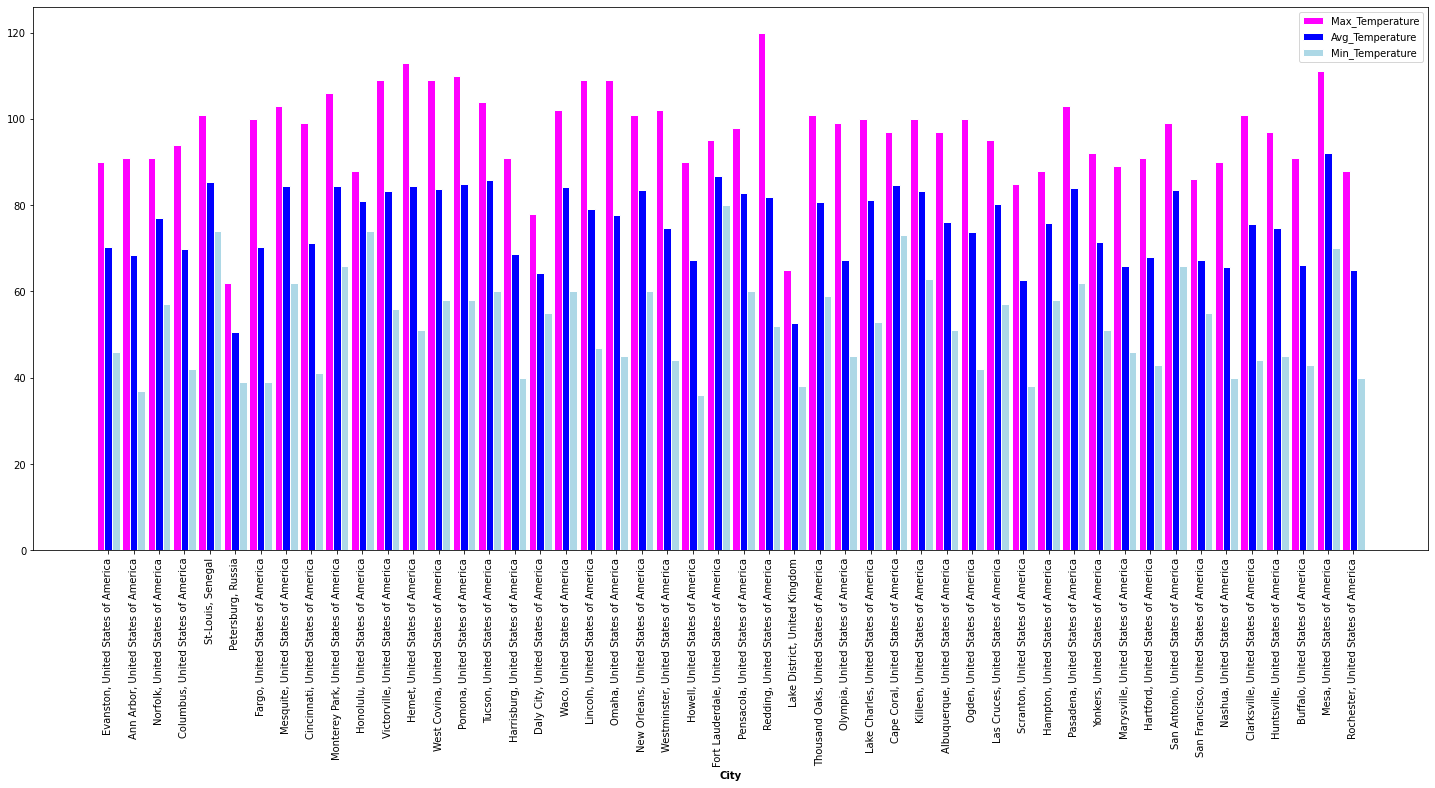

In [66]:
plt.figure(figsize = (25, 10))

# set width of bar
barWidth = 0.3
# set height of bar
bars1 = maxx
bars2 = avg
bars3 = minn
# Set position of bar on X axis
r1 = np.arange(len(bars1))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
# Make the plot
plt.bar(r1, bars1, color='magenta', width=barWidth, edgecolor='white', label="Max_Temperature")
plt.bar(r2, bars2, color='blue', width=barWidth, edgecolor='white', label="Avg_Temperature")
plt.bar(r3, bars3, color='lightblue', width=barWidth, edgecolor='white', label="Min_Temperature")
 
# Add xticks on the middle of the group bars
plt.xlabel("City", fontweight='bold')
plt.xticks([r + barWidth for r in range(len(bars1))], city1,rotation = 90)
 
# Create legend & Show graphic
plt.legend()
plt.show()


In [72]:
#Threading Version
result_list=[]
def get_data2(item):
   
    response = requests.get("http://api.worldweatheronline.com/premium/v1/past-weather.ashx?"
                                + "key=f975a49eca1c46da9f3151636221110"
                                + "&q=" + item
                                + "&date=2021-09-01&enddate=2021-09-30"
                                + "&format=json")
    result = response.json()
    tLock.acquire()
    result_list.append(result)  
    tLock.release()
    
    

In [78]:
from threading import Thread
import threading
import time
start_time = time.time()
city = ['Evanston', 'Ann Arbor', 'Norfolk', 'Columbus', 'St. Louis', 'St. Petersburg', 'Fargo', 'Mesquite', 'Cincinnati', 'Monterey', 'Honolulu', 'Victorville', 'Hemet', 'West Covina', 'Pomona', 'Tucson', 'Harrisburg', 'Daly City', 'Waco', 'Lincoln', 'Omaha', 'New Orleans', 'Westminster', 'Howell', 'Fort Lauderdale', 'Pensacola', 'Redding', 'Lakeland', 'Thousand Oaks', 'Olympia', 'Lake Charles', 'Cape Coral', 'Killeen', 'Albuquerque', 'Ogden', 'Las Cruces', 'Scranton', 'Hampton', 'Pasadena', 'Yonkers', 'Marysville', 'Hartford', 'San Antonio', 'San Francisco', 'Nashua', 'Clarksville', 'Huntsville', 'Buffalo', 'Mesa', 'Rochester']
thread_list=[]
tLock=threading.Lock()
for i in city:
    
    t=Thread(target=get_data2,args=(i,))
    t.start()
    thread_list.append(t)
for i in thread_list:
    i.join()
end_time = time.time()
Threadtime= end_time-start_time
print(("Threading time is "+ str(Threadtime) + " seconds"))
print(("Sequential time is "+ str(sequential_time) + " seconds"))

Threading time is 0.42125678062438965 seconds
Sequential time is 21.99564790725708 seconds


According to the output, threading is faster than sequential.

### Exercise 2 – Web Scraping
Scrape the Sample Address website for the following data set. 
https://www.summet.com/dmsi/html/codesamples/addresses.html

In [60]:
from bs4 import BeautifulSoup

In [61]:
url = 'https://www.summet.com/dmsi/html/codesamples/addresses.html'
response = requests.get(url)
soup = BeautifulSoup(response.text, 'html.parser')

In [62]:
states = ['Alabama', 'Alaska', 'American Samoa', 'Arizona', 'Arkansas', 'California', 'Colorado', 'Connecticut', 'Delaware', 'District of Columbia', 'Florida', 'Georgia', 'Guam', 'Hawaii', 'Idaho', 'Illinois', 'Indiana', 'Iowa', 'Kansas', 'Kentucky', 'Louisiana', 'Maine', 'Maryland', 'Massachusetts', 'Michigan', 'Minnesota', 'Mississippi', 'Missouri', 'Montana', 'Nebraska', 'Nevada', 'New Hampshire', 'New Jersey', 'New Mexico', 'New York', 'North Carolina', 'North Dakota', 'Northern Mariana Islands', 'Ohio', 'Oklahoma', 'Oregon', 'Pennsylvania', 'Puerto Rico', 'Rhode Island', 'South Carolina', 'South Dakota', 'Tennessee', 'Texas', 'Utah', 'Vermont', 'Virgin Islands', 'Virginia', 'Washington', 'West Virginia', 'Wisconsin', 'Wyoming'] 
states_abbrev = ['AL', 'AK', 'AS', 'AZ', 'AR', 'CA', 'CO', 'CT', 'DE', 'DC', 'FL', 'GA', 'GU', 'HI', 'ID', 'IL', 'IN', 'IA', 'KS', 'KY', 'LA', 'ME', 'MD', 'MA', 'MI', 'MN', 'MS', 'MO', 'MT', 'NE', 'NV', 'NH', 'NJ', 'NM', 'NY', 'NC', 'ND', 'MP', 'OH', 'OK', 'OR', 'PA', 'PR', 'RI', 'SC', 'SD', 'TN', 'TX', 'UT', 'VT', 'VI', 'VA', 'WA', 'WV', 'WI', 'WY']
state_count = [0] * len(states_abbrev)

In [63]:
data = soup.find_all("li")
data_list = []
for d in data:
    last_name = d.contents[0].split()[1]
    first_name = d.contents[0].split()[0]
    phone = d.contents[6]
    
    address = d.contents[4].split()
    zipcode = address[-1]
    
    city = ""
    if address[-2] in states:
        state = states_abbrev[states.index(address[-2])]
        city_name = address[:-2]
    elif address[-2] in states_abbrev:
        state = address[-2]
        city_name = address[:-2]
    elif address[-3] + " " + address[-2] in states:
        state = states_abbrev[states.index(address[-3] + " " + address[-2])]
        city_name = address[:-3]
        
    if len(city_name) == 1:
        city = city_name[0]
    else:
        i = 0
        while i < len(city_name):
            city += city_name[i] + " "
            i += 1
    city = city.rstrip(" ")
    
    state_count[states_abbrev.index(state)] += 1
    
    data_list.append([last_name, first_name, city, state, zipcode, phone])

In [64]:
# Create my own data types as class/objects.
class Person():
    def __init__(self, data_list):
        self.lastname = data_list[0]
        self.firstname = data_list[1]
        self.city = data_list[2]
        self.state = data_list[3]
        self.zipcode = data_list[4]
        self.phone = data_list[5]
        
    def info(self):
        print ("Last Name: " + self.lastname + 
               "\nFirst Name: " + self.firstname + 
               "\nCity: " + self.city + 
               "\nState: " + self.state + 
               "\nZip Code: " + self.zipcode + 
               "\nPhone: " + self.phone + 
               "\n--------------")

Last Name: Chapman
First Name: Cecilia
City: Mankato
State: MS
Zip Code: 96522
Phone: (257) 563-7401
--------------
Last Name: Watson
First Name: Iris
City: Frederick
State: NE
Zip Code: 20620
Phone: (372) 587-2335
--------------
Last Name: Slater
First Name: Celeste
City: Roseville
State: NH
Zip Code: 11523
Phone: (786) 713-8616
--------------
Last Name: Lowe
First Name: Theodore
City: Azusa
State: NY
Zip Code: 39531
Phone: (793) 151-6230
--------------
Last Name: Wise
First Name: Calista
City: San Antonio
State: MI
Zip Code: 47096
Phone: (492) 709-6392
--------------
Last Name: Olsen
First Name: Kyla
City: Tamuning
State: PA
Zip Code: 10855
Phone: (654) 393-5734
--------------
Last Name: Ray
First Name: Forrest
City: Corona
State: NM
Zip Code: 08219
Phone: (404) 960-3807
--------------
Last Name: Potter
First Name: Hiroko
City: Muskegon
State: KY
Zip Code: 12482
Phone: (314) 244-6306
--------------
Last Name: Vazquez
First Name: Nyssa
City: Chelsea
State: MI
Zip Code: 67708
Phone: (9

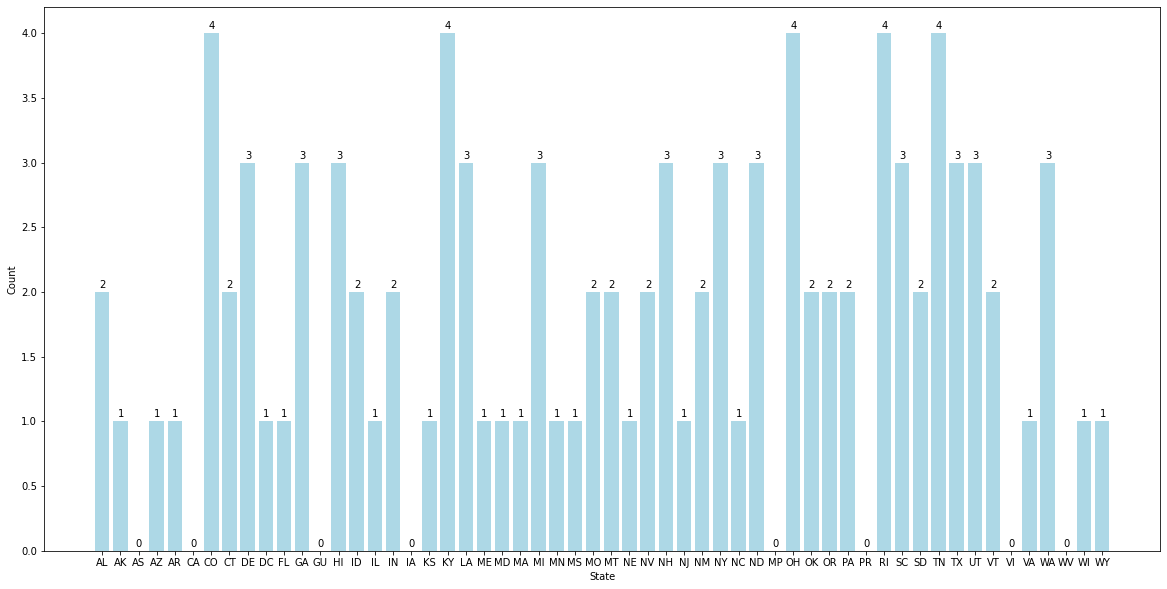

In [79]:
for i in range(len(data_list)):
    person_info = Person(data_list[i])
    person_info.info()
    
# Provide a plot showing the count by state
plt.figure(figsize=(20,10))
plt.bar(states_abbrev, state_count, align = 'center', width = 0.8, color = 'lightblue')
plt.xlabel("State")
plt.ylabel("Count")

for index, value in enumerate(state_count):
    plt.text(index - 0.15, value + 0.03, str(value))
    
plt.show()